# クラスター分析

判別分析ではあらかじめクラスラベル(群)が付与されたデータを元に、ラベルが未知の新たに取得したデータを分類するのに適した次元削減を行なった。  
**クラスター分析**はクラスラベルの情報が与えられない状況で、特徴量の類似度や距離に基づきデータをいくつかのグループに分類する方法であり、個体間の関係を理解するのに有用な手法である。  
クラスタリング手法は、階層的手法と非階層的手法に大別される。  
クラスター分析の結果は用いるアルゴリズムのみならず、採用するデータ同士の距離に大きく影響を受けるため、データの性質に応じた距離を採用することが重要である。  
代表的なものは**ミンコフスキー距離**の特殊な場合と、**マハラノビス距離**があげられる。

ミンコフスキー距離は、
$$
d_m(x,y) = \sum_{i=1}^{p} (|x_i-y_i|^m)^{1/m}
$$
で定義され、$m=2$の時を**ユークリッド距離**、$m=1$の時を$L_1$**距離**あるいは**マンハッタン距離**と呼ぶ。

In [1]:
import numpy as np
from scipy.spatial.distance import minkowski

a = np.array([1,1,1])
b = np.array([1,2,4])

# ユークリッド距離
euclidean_distance = minkowski(a, b, 2)
print(f"ユークリッド距離:{euclidean_distance:.3f}")

# マンハッタン距離
manhattan_distance = minkowski(a, b, 1)
print(f"マンハッタン距離:{manhattan_distance:.3f}")

ユークリッド距離:3.162
マンハッタン距離:4.000


マハラノビス距離は、2つのベクトル$x,y \in R^p$が同一の共分散行列$\Sigma$をもつ確率分布に従うとして、
$$
d_M =  \sqrt{(x-y)^T \Sigma^{-1} (x-y)}
$$
で定義される。

In [2]:
from scipy.spatial.distance import mahalanobis

X = np.array([[0, 0], [1, 1], [2, 2]])

# 分散共分散行列を計算
cov = np.cov(X.T)
# 分散共分散行列の逆行列を計算
cov_i = np.linalg.pinv(cov)

# 2つの標本 [1, 1] と [0, 0] のマハラノビス距離を計算する
mahalanobis_distance = mahalanobis([1, 1], [0,0], cov_i)
print(f"マハラノビス距離:{mahalanobis_distance:.3f}")

マハラノビス距離:1.000


# 階層的手法

**階層的クラスタリング**は、はじめに一つのサンプル$x_i$が1つのクラスターを構成するとみなし、距離が近いあるいは類似性の高いサンプル同士$x_i,x_j(i \neq j)$を順次グループ化していき、最後に大きな1つのクラスターにまとめ上げていく。  
階層的手法は**デンドログラム**を通してクラスター形成のプロセスを視覚的に把握できるという利点がある。  
階層的手法では、個々のサンプルの間に距離あるいは類似度を定義する必要があるだけでなく、クラスター同士にも距離や類似度を定義する必要がある。  
クラスタリングは探索的データ分析の手法であり、サンプル間、クラスター間の類似度はデータの性質を鑑みて検討することになる。

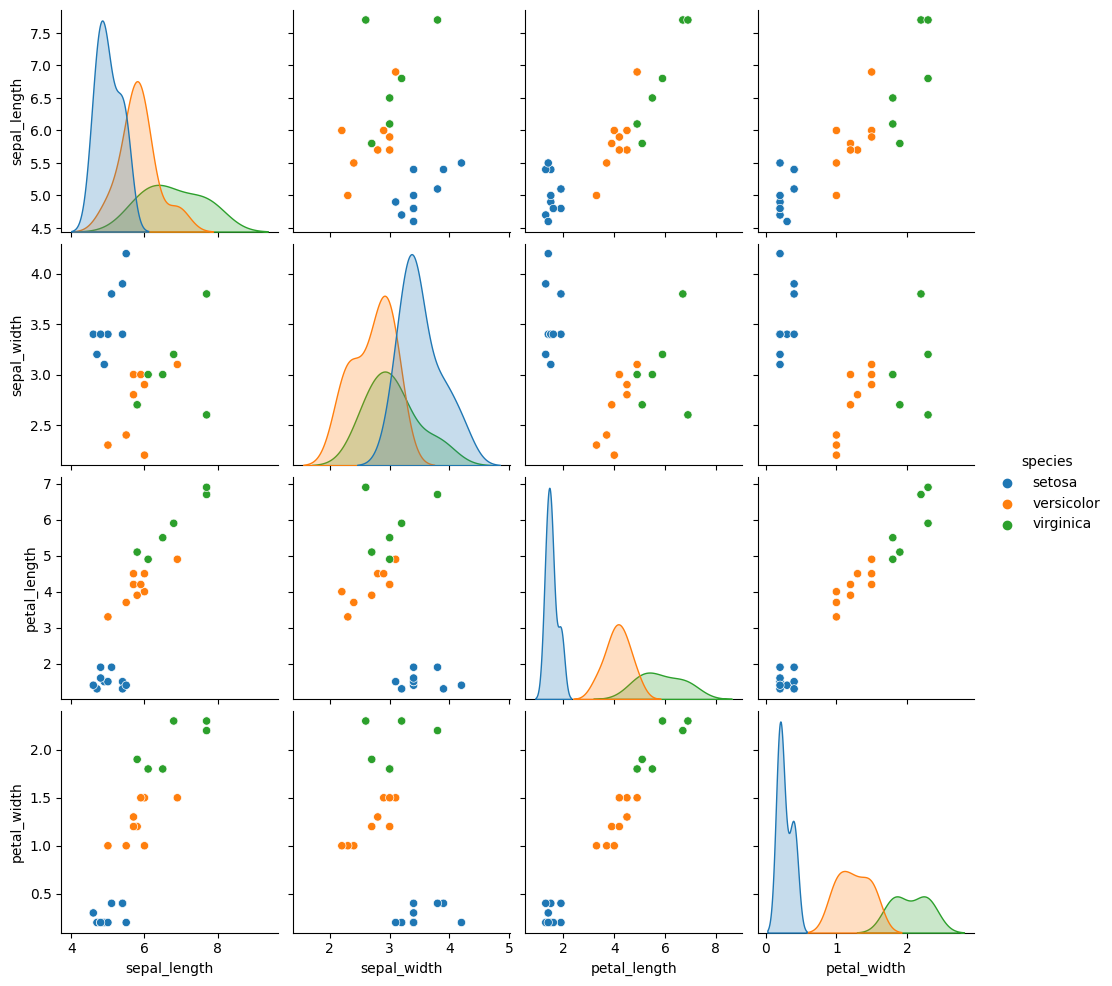

In [3]:
# データセットを準備(irisデータ)
import pandas as pd
import seaborn as sns

df = sns.load_dataset("iris")
df = df.sample(n=25)
sns.pairplot(df, hue='species')

x_df = df[["sepal_length", "sepal_width", "petal_length","petal_width"]]

以下ではサンプル間に何らかの距離$d(x,y)$が定義されていることを仮定し、その距離に基づいた代表的なクラスターの併合方法を説明する。

### 最近隣法(単リンク法、最短距離法)

全ての組み合わせのうち最も近い距離をクラスター間の距離として用いる。

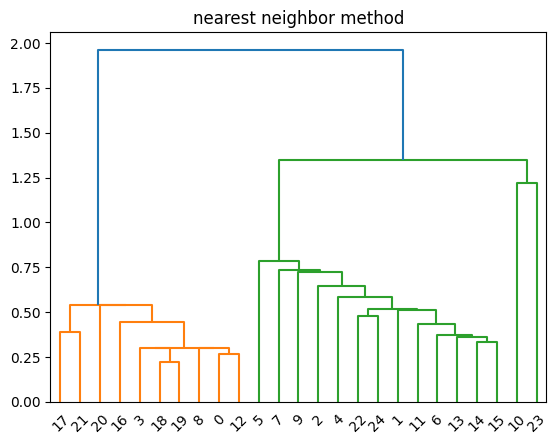

In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

clu = linkage(x_df, method='single', metric='euclidean')
dendrogram(clu)
plt.title("nearest neighbor method")
plt.show()

### 最遠隣法(最長距離法)

全ての組み合わせのうち最も遠い距離をクラスター間の距離として用いる。

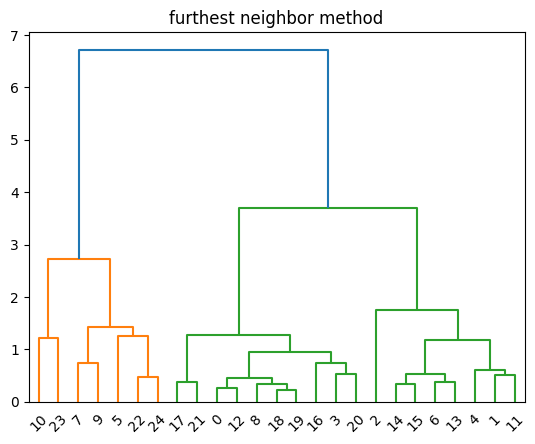

In [5]:
clu = linkage(x_df, method='complete', metric='euclidean')
dendrogram(clu)
plt.title("furthest neighbor method")
plt.show()

### 重心法(セントロイド法)

それぞれのクラスター間の重心間の距離をクラスター間の距離として用いる。

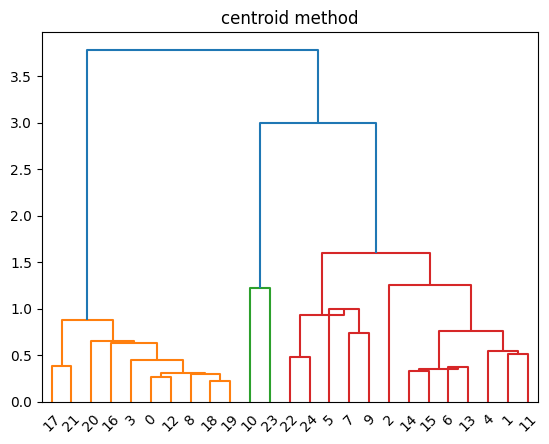

In [6]:
clu = linkage(x_df, method='centroid', metric='euclidean')
dendrogram(clu)
plt.title("centroid method")
plt.show()

### 群平均法

全ての組み合わせの平均法をクラスター間の距離として用いる。

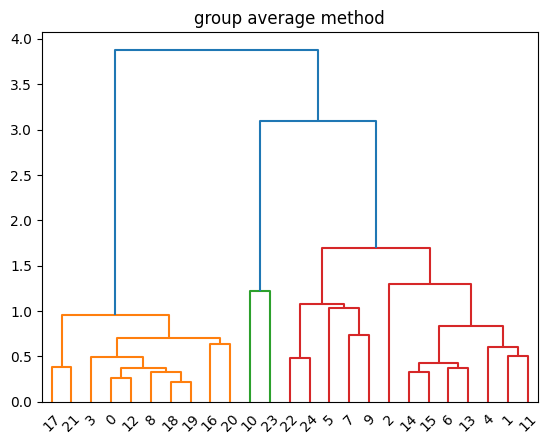

In [7]:
clu = linkage(x_df, method='average', metric='euclidean')
dendrogram(clu)
plt.title("group average method")
plt.show()

### ウォード法

それぞれのデータの平方和（それぞれのデータと平均値の差を二乗和）を求め、平方和が小さなものからクラスタを作っていく手法。

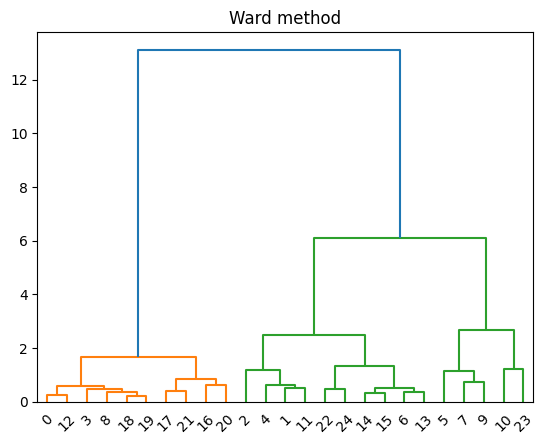

In [8]:
clu = linkage(x_df, method='ward', metric='euclidean')
dendrogram(clu)
plt.title("Ward method")
plt.show()

なお、階層的クラスタリングにおけるクラスター・サンプルの合併の途中での、クラスターあるいは個体間の距離行列のことを**コーフェン行列**と呼ぶことがある。

# 非階層的手法

**非階層的クラスタリング**では、全てのサンプルをあらかじめ指定したクラスター数に分類する。  
クラスターを階層的に捉える必要がない時には有用な方法である。  
多くの場合、各サンプルのクラスター割り当ての悪さを表す何らかの指標(損失関数)を定義し、その指標の最小化問題として定式化する。  
非階層的クラスタリングの代表的手法は、**K-means法**であり、$K$個のあらかじめ指定したクラスター数に各サンプルを分類する。  
$k$番目のクラスターに属するサンプル集合を$C_k$として、目的関数
$$
J(\{C_k\}) = \sum_{k=1}^{K} \sum_{x_i \in C_k} d(x_i, \bar{x_k})
$$
を最小化するクラスター割り当てを探す。ここで、$\bar{x_k}$は$k$番目のクラスターに属するサンプルの平均ベクトルである。  
この問題は組み合わせ最適化問題であり、厳密な解を得ることは難しい。  
そこで、K-means法では全てのサンプルを$K$個のクラスターのいずれかに適当に分類して$K$個の部分集合$C_k^{(0)}, k=1,...,K$を作った上で、各サンプルが割り当てられるクラスターが変化しなくなるまで次の2ステップを繰り返す。  
1. クラスター中心の更新：現在のクラスターに割り当てられている対象の中心を計算する。  
1. クラスター割り当ての更新：全てのサンプルに対して、中心との距離が最も近いクラスターに再割り当てを行う。  

K-means法の結果は初期クラスター中心の選び方に依存する。  
また、何らかの根拠や必要性からクラスター数が定まっている場合以外は、適切なクラスター数を自分で定める必要があり、その選択はクラスタリング結果に大きく影響する。

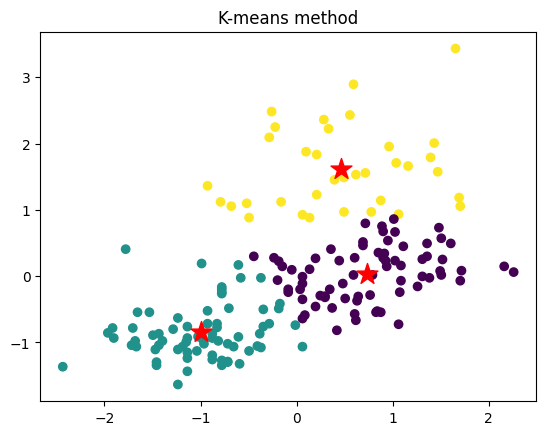

In [10]:
# ワインデータでK-means法によるクラスタリングを実施
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans

wine_data = datasets.load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

X=df[["alcohol","color_intensity"]]
sc = preprocessing.StandardScaler() # クラスタリング用にデータを整形
sc.fit(X)
X_norm = sc.transform(X)

# クラスタリング
cls = KMeans(n_init="auto", n_clusters=3)
result = cls.fit(X_norm)

# 結果を可視化
plt.scatter(X_norm[:,0],X_norm[:,1], c=result.labels_)
plt.scatter(result.cluster_centers_[:,0],result.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.title("K-means method")
plt.show()

# 混合分布とEMアルゴリズムによる非階層的クラスタリング

データの生成モデルとして**混合分布**を仮定することによりクラスタリングを行うこともできる。  
混合要素となる分布はさまざまなものが考えられる。  
パラメータ$θ_k, K=1,..,K$で特徴付けられる確率分布の確率密度関数を$f_k(x;\theta_k)$として、混合比$\pi_kk \geq 0, k=1,..,K, \sum_{k=1}^{K} \pi_k=1$による混合分布
$$
f(x; \{\pi_k, \theta_k \}_{k=1}^{K}) = \sum_{k=1}^{K} \pi_k f_k(x; \theta_k)
$$
を考え、サンプルをこの混合分布に代入して得られる尤度関数を$\pi_k, \theta_k$に関して最大化する。  
個々のサンプル$x$は$\pi_k f_k(x; \theta_k)$に比例する確率で$k$番目のクラスターに属すると考える。  
一般には上記の尤度最大化は困難であるため、EMアルゴリズムが用いられることが多い。
詳細は「29_不完全データの統計処理.ipynb」を参照のこと

# 計算量についての補足

K-means法の実行に必要な計算量は、$n$個のサンプルがある場合に$O(nK)$である。  
一方、階層的クラスタリング手法の場合は$O(n^2)$の計算量が必要となるため、サンプルサイズが多い場合には実行が困難となることがある。